<a href="https://colab.research.google.com/github/chaiminwoo0223/Deep-Learning/blob/main/04%20-%20Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.선형 회귀(Linear Regression)

- 선형 관계를 가지고 있는 데이터 (Linear Data)
- 선형 모델 (Linear Model)
- y = 2x+3

In [1]:
!pip3 install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import torch

In [3]:
# Neural Network의 약자로 인공신경망 연산들이 들어있다.(예. Linear, Convolution, RNN 등)
import torch.nn as nn           
# 모델을 최적화 하는데 필요한 최적화 함수들이 들어있다.(예. SGD, ADAM 등)
import torch.optim as optim
# 텐서를 초기화 하는 함수들이 들어있다.(예. uniform, normal, xavier 등)
import torch.nn.init as init
# 데이터나 학습 결과를 출력하는 함수들이 들어있다.
import matplotlib.pyplot as plt

## 2.데이터 생성

In [4]:
# 데이터의 개수는 1000개, 학습 횟수는 500회(임의로 지정한 수치) 
num_data = 1000
num_epoch = 500
# 데이터에 추가할 노이즈는 정규분포를 따르게 만들어준다.(평균은 0, 편차는 0.2)
noise = init.normal_(torch.FloatTensor(num_data,1),std=0.2)
# x는 1000x1 형태를 가지고, -10에서 10 사이의 값들을 uniform 하게 가진다.
x = init.uniform_(torch.Tensor(num_data,1),-10,10)
# 연산 그래프
y = 2*x+3
# 학습할 때 y_noise를 목표값으로 사용한다.
# 실제 데이터를 사용할 때, 여러 측정과정에서 노이즈가 추가되는 경우가 많기 때문이다. 
y_noise = y + noise

## 3.데이터 시각화

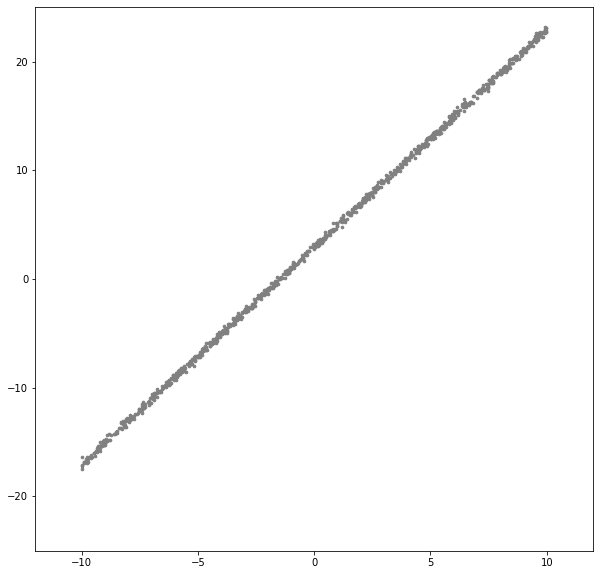

In [5]:
# matplotlib의 scatter 함수를 사용해, 학습 데이터를 확인한다.

# figure의 크기를 지정한다.
plt.figure(figsize=(10,10))
# x축에는 x를 사용하고, y축에는 y_noise를 사용한다.(plt.scatter)
plt.scatter(x.numpy(),y_noise.numpy(),s=7,c="gray")
# figure의 x,y 축 범위를 지정한다.
plt.axis([-12, 12, -25, 25])
# figure를 출력한다.
plt.show()

## 4.모델, 손실함수, 최적화 함수 설정

In [6]:
# 선형 모델을 생성한다.
# 입력으로 들어오는 x가 1000x1 의 형태를 가지고 있기 때문에, 특성의 개수가 1개이다. 따라서 앞에 1이 들어가야 한다. Linear(1,?)
# 출력으로 기대하는 값 또한 1000x1 의 형태이기 때문에, 특성의 개수가 1개이다. 따라서 뒤에 1이 들어가야 한다.       Linear(?,1)
model = nn.Linear(1,1)
# 손실 함수를 지정한다.(L1 손실)
loss_func = nn.L1Loss()
# 최적화 함수를 지정한다.(SGD)
# 학습의 대상이 되는 모델의 변수(model.parameters())를 전달한다.(학습률 = 0.01)
optimizer = optim.SGD(model.parameters(),lr=0.01)

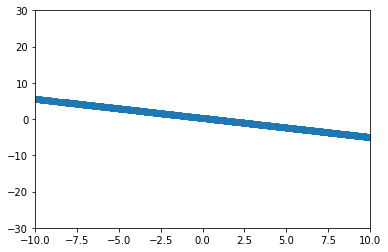

tensor(12.8983)


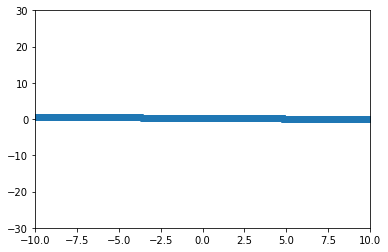

tensor(10.4540)


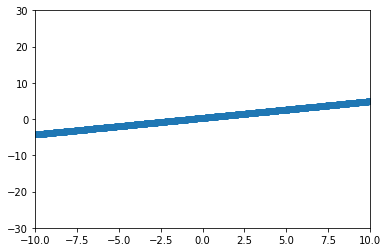

tensor(8.0440)


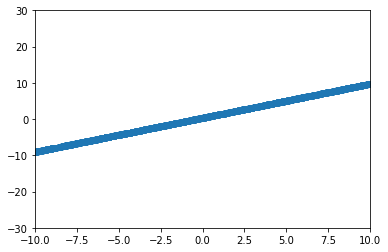

tensor(5.7306)


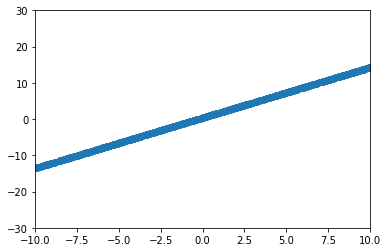

tensor(3.6931)


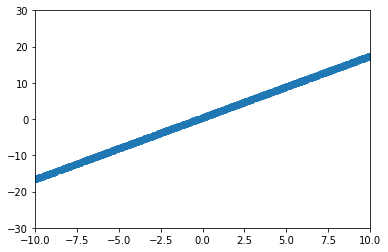

tensor(2.6721)


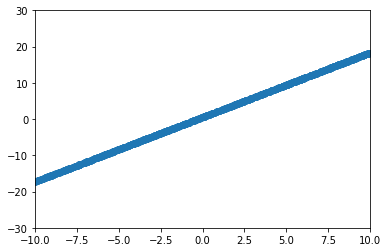

tensor(2.5099)


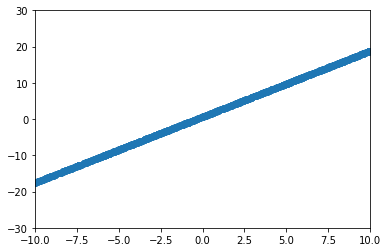

tensor(2.3961)


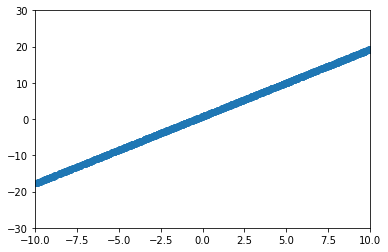

tensor(2.2838)


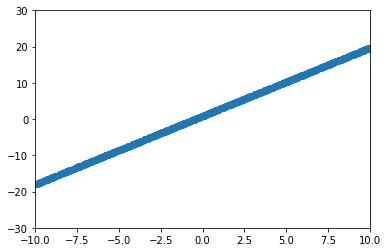

tensor(2.1715)


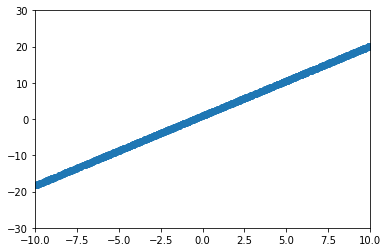

tensor(2.0592)


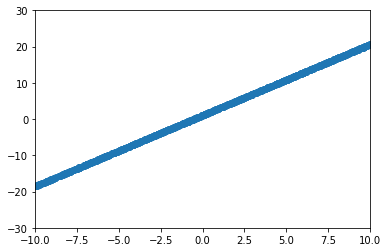

tensor(1.9469)


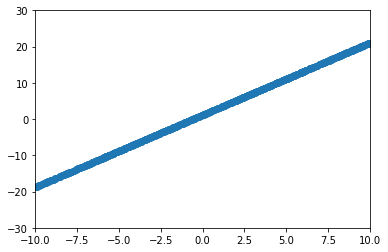

tensor(1.8346)


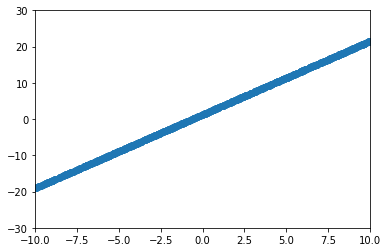

tensor(1.7223)


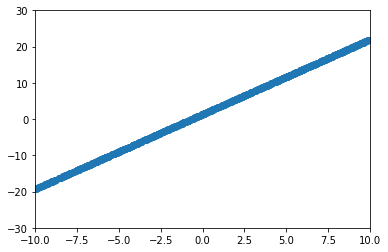

tensor(1.6100)


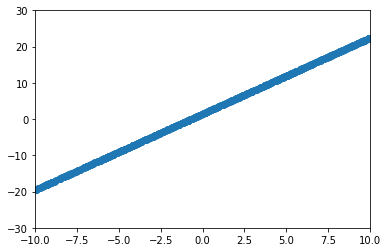

tensor(1.4977)


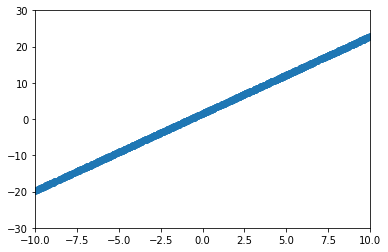

tensor(1.3904)


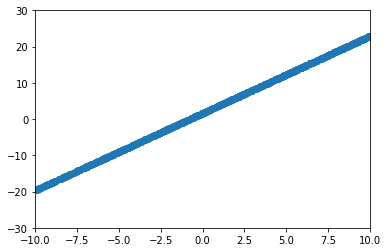

tensor(1.2973)


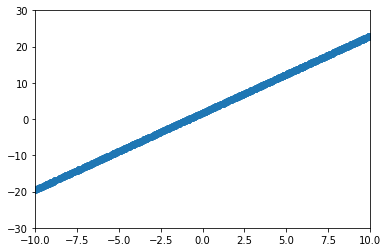

tensor(1.2058)


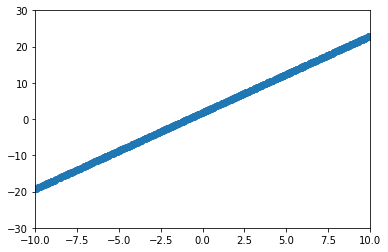

tensor(1.1146)


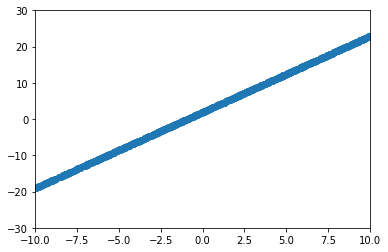

tensor(1.0235)


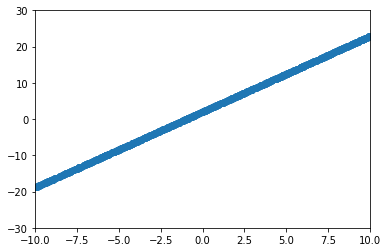

tensor(0.9325)


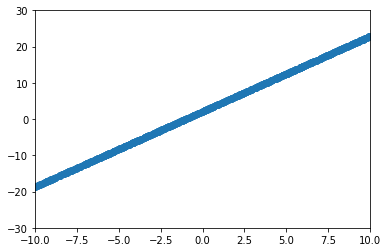

tensor(0.8416)


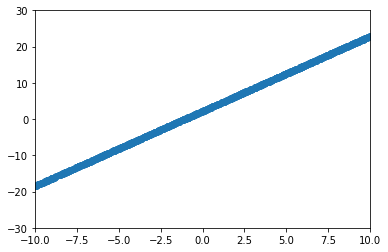

tensor(0.7509)


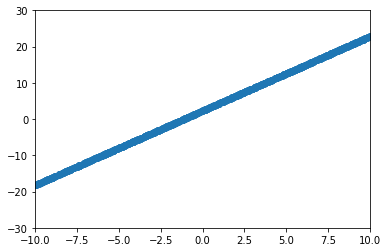

tensor(0.6604)


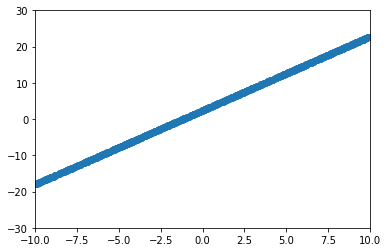

tensor(0.5707)


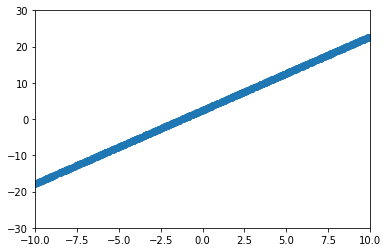

tensor(0.4818)


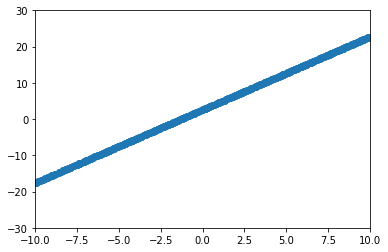

tensor(0.3948)


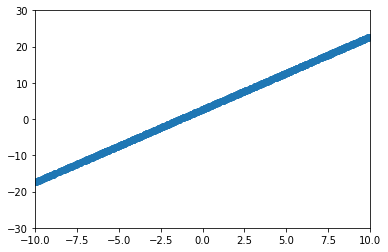

tensor(0.3131)


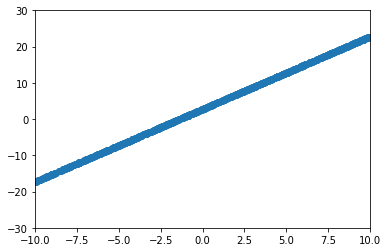

tensor(0.2486)


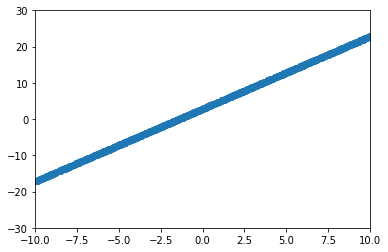

tensor(0.2068)


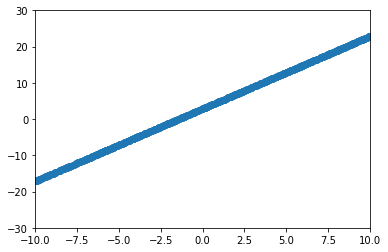

tensor(0.1839)


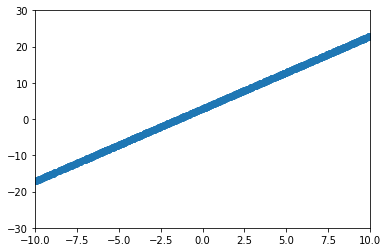

tensor(0.1711)


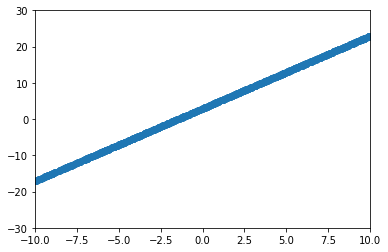

tensor(0.1651)


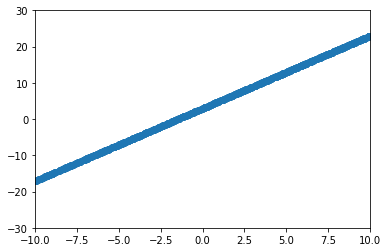

tensor(0.1625)


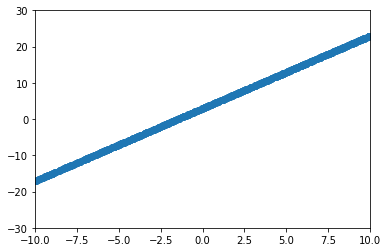

tensor(0.1614)


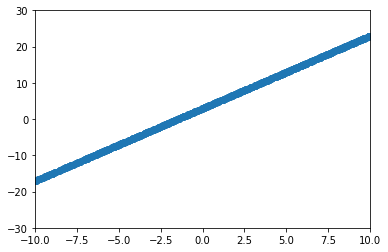

tensor(0.1609)


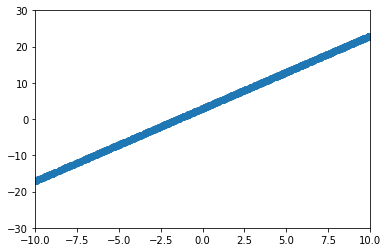

tensor(0.1607)


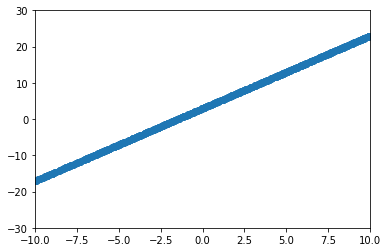

tensor(0.1606)


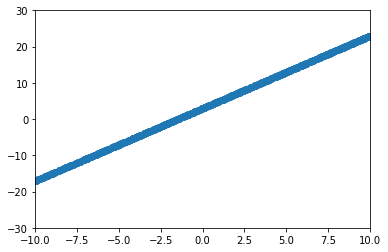

tensor(0.1605)


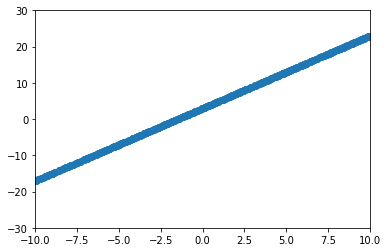

tensor(0.1605)


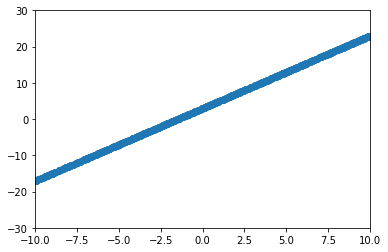

tensor(0.1604)


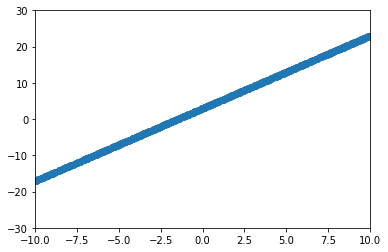

tensor(0.1604)


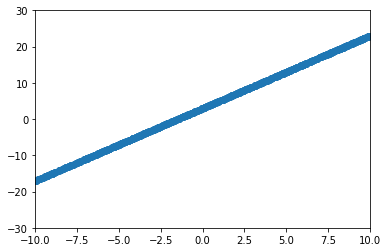

tensor(0.1604)


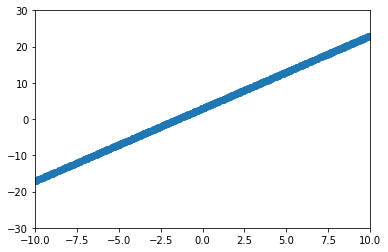

tensor(0.1604)


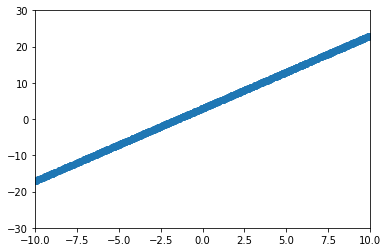

tensor(0.1604)


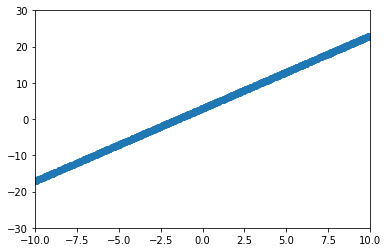

tensor(0.1604)


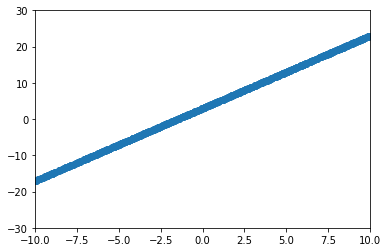

tensor(0.1604)


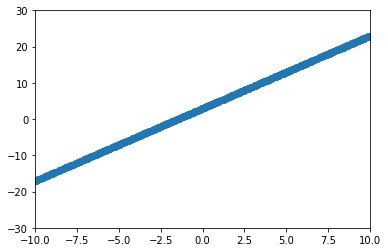

tensor(0.1604)


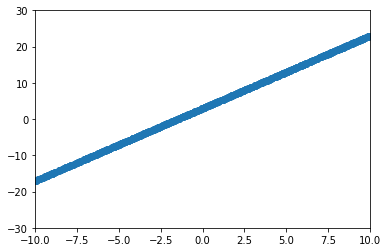

tensor(0.1604)


In [7]:
# 손실이 어떻게 변하는지 확인하기 위해tj, loss_arr를 만들어 기록한다.
loss_arr =[]
# 목표값은 y_noise로 지정한다.
label = y_noise
# 500으로 지정했던 학습 횟수만큼 반복한다.
for i in range(num_epoch):
    # 이전 학습의 기울기를 지우고, 최적화 함수를 초기화한다.
    # 기울기를 지우지 않으면, 기존의 업데이트 때문에, 학습이 잘 이루어지지 않는다.
    optimizer.zero_grad()
    # 입력값 x를 모델에 넣어서, 결과값을 얻는다.
    output = model(x)
    # 결과값과 목표값의 차이를 L1 손실 함수로 구한다.
    loss = loss_func(output,label)
    # 손실에 대한 기울기를 구한다.
    loss.backward()
    # 구한 기울기를 이용해, 모델의 변수를 업데이트한다.
    optimizer.step()
    # 10번 마다 모델의 변수가 어떻게 변하고 있는지 출력한다.
    if i % 10 == 0:
        # 현재 연산 그래프에 속해있는 x, output 값을 detach를 통해 분리한다.
        # 텐서를 넘파이 배열로 바꿔서, plt.scatter에 전달한다.
        plt.scatter(x.detach().numpy(),output.detach().numpy())
        plt.axis([-10, 10, -30, 30])
        plt.show()
        print(loss.data)
    # 손실을 loss_arr에 추가한다.
    loss_arr.append(loss.detach().numpy())

## 5.학습 후 데이터와 모델 결과값 확인

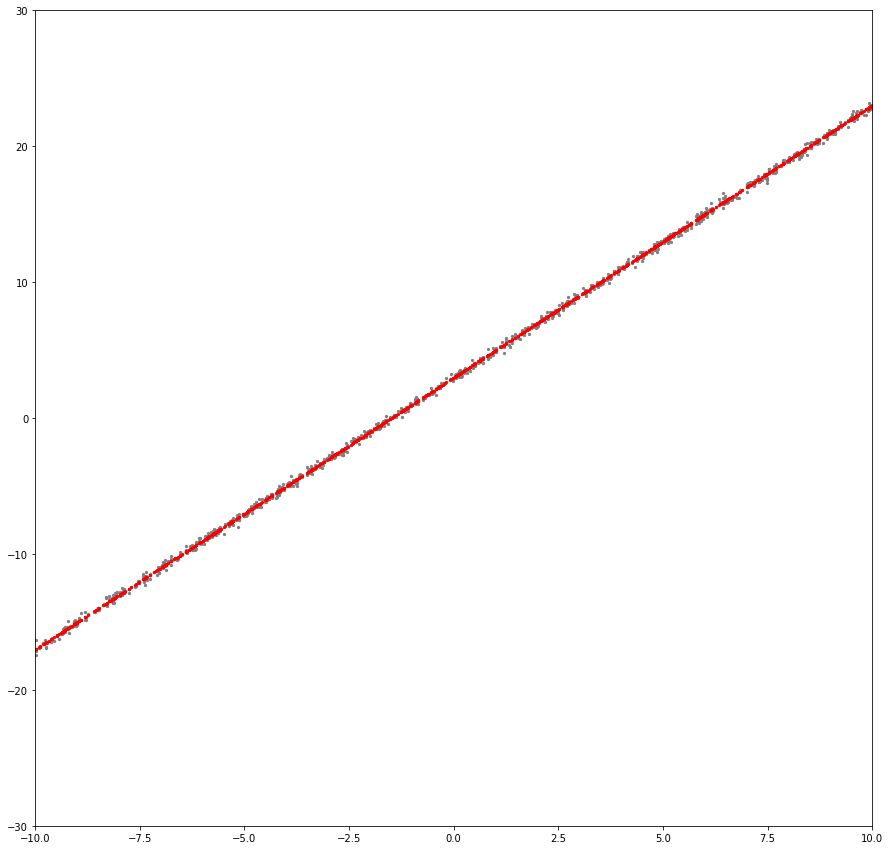

In [8]:
plt.figure(figsize=(15,15))
plt.scatter(x.numpy(),y_noise.numpy(),s=5,c="gray")
plt.scatter(x.detach().numpy(),output.detach().numpy(),s=5,c="red")
plt.axis([-10, 10, -30, 30])
plt.show()

## 6.손실 그래프

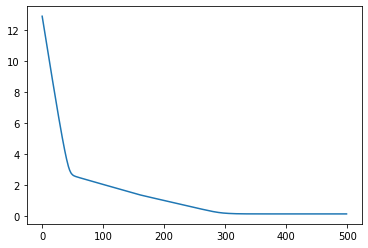

In [9]:
# matplotlib의 plot 함수를 이용해, 손실이 어떻게 줄어가는지 확인한다. 
plt.plot(loss_arr)
plt.show()

## 7.학습 후 모델 변수 값 확인

In [10]:
# 현재 모델은 weight와 bias을 변수로 가지고 있는데, 학습이 완료된 값들이 실제 몇인지 수치적으로 확인한다.
param_list = list(model.parameters())
print("Weight:",param_list[0].item(),"\nBias  :",param_list[1].item())

Weight: 2.0016913414001465 
Bias  : 2.986100435256958
